# 6.2: Exploring Relationships

### 1. Importing Visualization Libraries & Data
### 2. Exploring Relationships

#### 1. Importing Visualization Libraries & Data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [5]:
# Create file path
path = r'C:\Users\gre60\OneDrive\CareerFoundry Data Analytics Program\Data Immersion\Achievement 6\NFL Final Project 2'

In [6]:
# Import nfl_spread_analysis data
nfl_spread_analysis = pd.read_csv(os.path.join(path, 'nfl_spread_analysis.csv'))

In [7]:
nfl_spread_analysis.shape

(6978, 33)

In [8]:
nfl_spread_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6978 entries, 0 to 6977
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        6978 non-null   int64  
 1   game_id           6978 non-null   object 
 2   season            6978 non-null   int64  
 3   game_type         6978 non-null   object 
 4   week              6978 non-null   int64  
 5   gameday           6978 non-null   object 
 6   weekday           6978 non-null   object 
 7   gametime          6719 non-null   object 
 8   away_team         6978 non-null   object 
 9   away_score        6706 non-null   float64
 10  home_team         6978 non-null   object 
 11  home_score        6706 non-null   float64
 12  location          6978 non-null   object 
 13  actual_spread     6706 non-null   float64
 14  actual_total      6706 non-null   float64
 15  overtime          6706 non-null   float64
 16  away_rest         6978 non-null   int64  


In [9]:
nfl_spread_analysis.head()

,Unnamed: 0,game_id,season,game_type,week,gameday,weekday,gametime,away_team,away_score,...,temp,wind,stadium_id,stadium,home_market,home_name,away_market,away_name,home_division,away_division
0,0,1999_01_MIN_ATL,1999,REG,1,9/12/1999,Sunday,NaN,MIN,17.0,...,NaN,NaN,ATL00,Georgia Dome,Atlanta,Falcons,Minnesota,Vikings,NFC South,NFC North
1,1,1999_01_KC_CHI,1999,REG,1,9/12/1999,Sunday,NaN,KC,17.0,...,80.0,12.0,CHI98,Soldier Field,Chicago,Bears,Kansas City,Chiefs,NFC North,AFC West
2,2,1999_01_PIT_CLE,1999,REG,1,9/12/1999,Sunday,NaN,PIT,43.0,...,78.0,12.0,CLE00,Cleveland Browns Stadium,Cleaveland,Browns,Pittsburgh,Steelers,AFC North,AFC North
3,3,1999_01_OAK_GB,1999,REG,1,9/12/1999,Sunday,NaN,OAK,24.0,...,67.0,10.0,GNB00,Lambeau Field,Green Bay,Packers,Oakland,Raiders,NFC North,AFC West
4,4,1999_01_BUF_IND,1999,REG,1,9/12/1999,Sunday,NaN,BUF,14.0,...,NaN,NaN,IND99,RCA Dome,Indianapolis,Colts,Buffalo,Bills,AFC South,AFC East


In [10]:
# Remove unamed: 0 column
nfl_spread_analysis = nfl_spread_analysis.drop('Unnamed: 0', axis=1)

In [11]:
nfl_spread_analysis.dtypes

game_id              object
season                int64
game_type            object
week                  int64
gameday              object
weekday              object
gametime             object
away_team            object
away_score          float64
home_team            object
home_score          float64
location             object
actual_spread       float64
actual_total        float64
overtime            float64
away_rest             int64
home_rest             int64
projected_spread    float64
projected_total     float64
div_game              int64
roof                 object
surface              object
temp                float64
wind                float64
stadium_id           object
stadium              object
home_market          object
home_name            object
away_market          object
away_name            object
home_division        object
away_division        object
dtype: object

#### 2. Exploring Relationships

In [13]:
# Create subset of data with only numerical columns
numerical_columns = nfl_spread_analysis.select_dtypes(include=['int', 'float'])
numerical_columns.head()

,season,week,away_score,home_score,actual_spread,actual_total,overtime,away_rest,home_rest,projected_spread,projected_total,div_game,temp,wind
0,1999,1,17.0,14.0,-3.0,31.0,0.0,7,7,-4.0,49.0,0,NaN,NaN
1,1999,1,17.0,20.0,3.0,37.0,0.0,7,7,-3.0,38.0,0,80.0,12.0
2,1999,1,43.0,0.0,-43.0,43.0,0.0,7,7,-6.0,37.0,1,78.0,12.0
3,1999,1,24.0,28.0,4.0,52.0,0.0,7,7,9.0,43.0,0,67.0,10.0
4,1999,1,14.0,31.0,17.0,45.0,0.0,7,7,-3.0,45.5,1,NaN,NaN


In [14]:
# Create correlation matrix
corr_matrix = numerical_columns.corr()

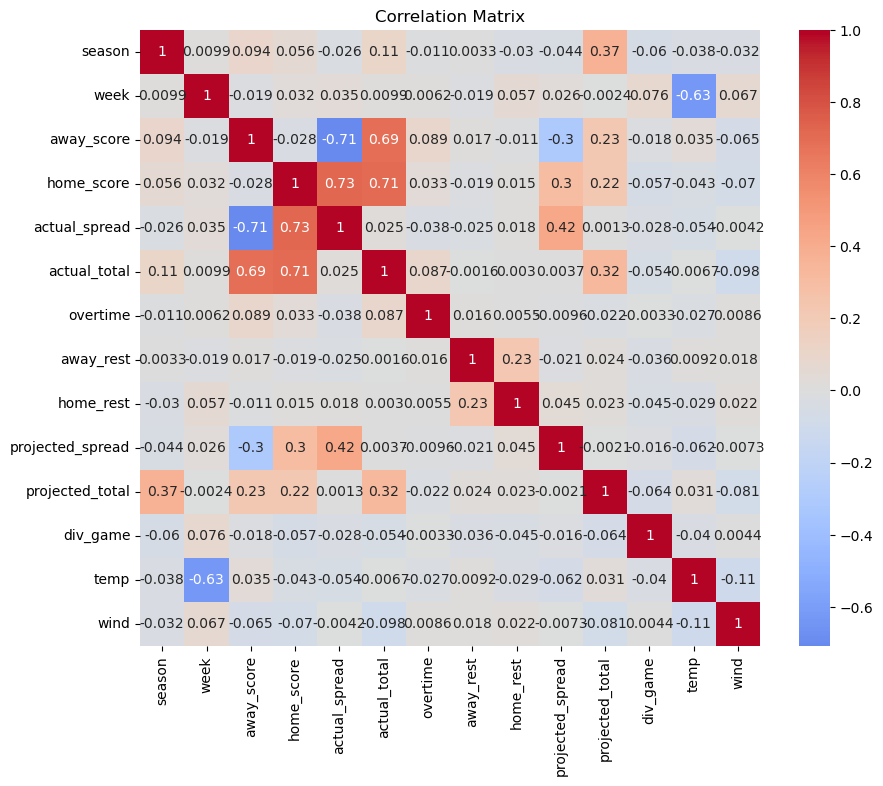

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()


#### According to the legend, a darker red square indicates a stronger correlation between the two variables. On the other hand, a lighter blue square signifies a stronger negative correlation between them.

In [33]:
# Create spread correlation
spread_correlation = numerical_columns['projected_spread'].corr(numerical_columns['actual_spread'])
spread_correlation

0.4203989104963466

### Is there a correlation between the spread line and the actual score difference?

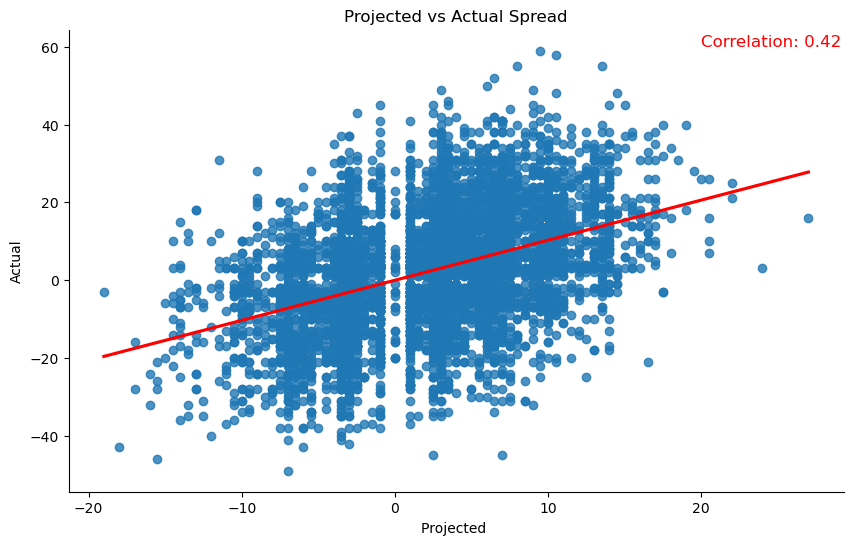

In [38]:
plt.figure(figsize=(10, 6))
ax = sns.regplot(x='projected_spread', y='actual_spread', data=numerical_columns, ci=None, line_kws={'color': 'red'})
plt.text(20, 60, f'Correlation: {spread_correlation:.2f}', fontsize=12, color='red')
plt.title('Projected vs Actual Spread')
plt.xlabel('Projected ')
plt.ylabel('Actual')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
plt.savefig('projected_vs_actual_spread.png')
plt.show()

#### This indicates a moderate positive relationship between projected and actual spread.

In [21]:
# Create total correlation
total_correlation = numerical_columns['projected_total'].corr(numerical_columns['actual_total'])
total_correlation

0.32065271377399024

### Is there a correlation between the total line and the actual total?

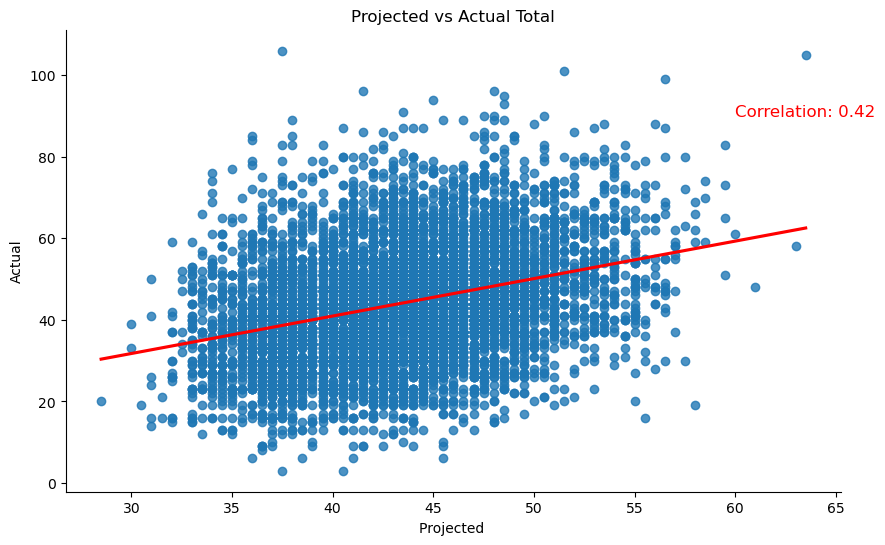

In [23]:
plt.figure(figsize=(10, 6))
ax = sns.regplot(x='projected_total', y='actual_total', data=numerical_columns, ci=None, line_kws={'color': 'red'})
plt.text(60, 90, f'Correlation: {spread_correlation:.2f}', fontsize=12, color='red')
plt.title('Projected vs Actual Total')
plt.xlabel('Projected ')
plt.ylabel('Actual')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
plt.show()

#### This indicates a moderate positive relationship between projected and actual total.

### Pair Plot

In [26]:
# Create pair plot dataset for variables I want to be used
pair_plot_df = numerical_columns[['projected_spread', 'actual_spread', 'projected_total', 'actual_total', 'wind', 'temp']]

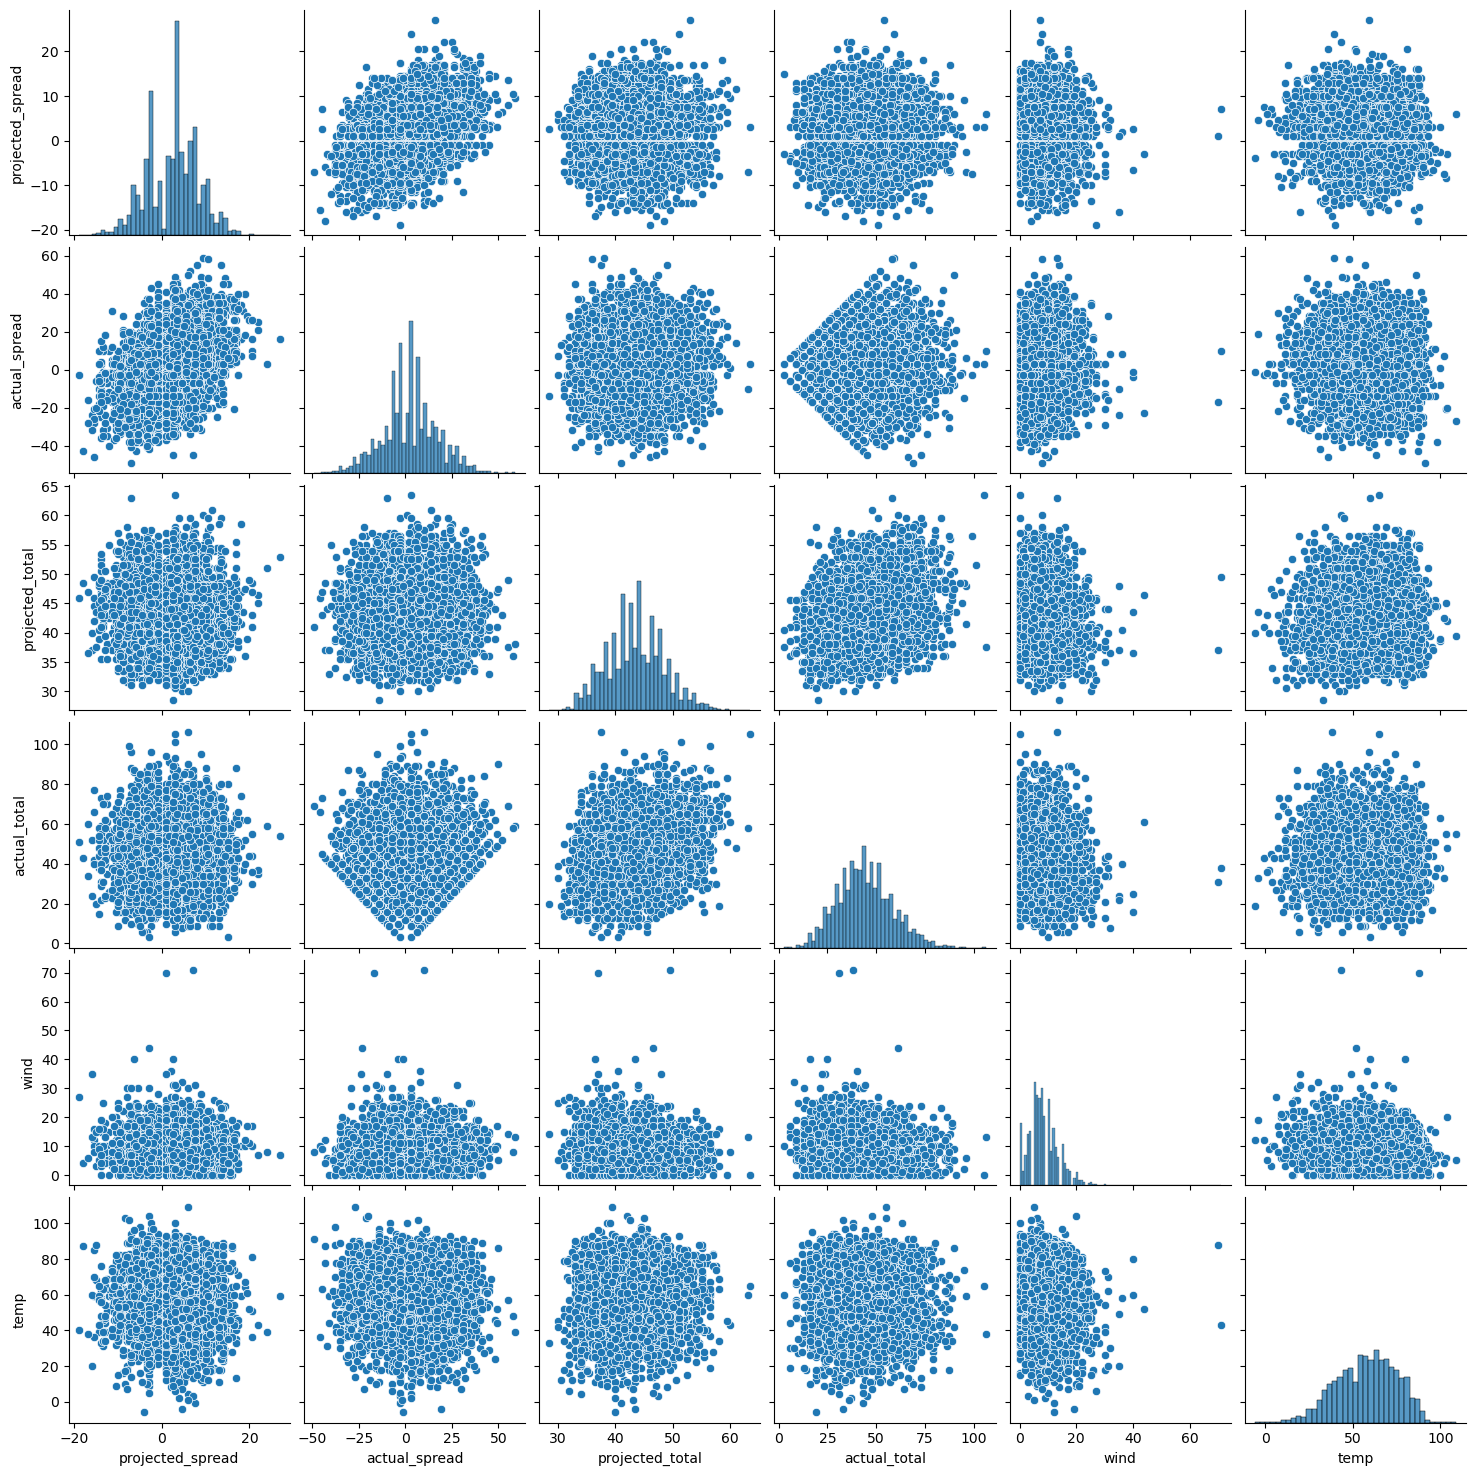

In [27]:
pair = sns.pairplot(pair_plot_df)

#### Based on the pair plot visual it seems clear that the temperature and wind speed affect the sportsbooks spreads and totals along with the actual results of NFL games. Wind and Temperature could play more of a role inside or warmer climate NFL teams so it's still worth exploring further.

### Categorical Plots and Exploring hypotheses and key questions

In [30]:
nfl_spread_analysis.columns.to_list()

['game_id',
 'season',
 'game_type',
 'week',
 'gameday',
 'weekday',
 'gametime',
 'away_team',
 'away_score',
 'home_team',
 'home_score',
 'location',
 'actual_spread',
 'actual_total',
 'overtime',
 'away_rest',
 'home_rest',
 'projected_spread',
 'projected_total',
 'div_game',
 'roof',
 'surface',
 'temp',
 'wind',
 'stadium_id',
 'stadium',
 'home_market',
 'home_name',
 'away_market',
 'away_name',
 'home_division',
 'away_division']

#### How does the type of roof (open, closed, retractable) affect game outcomes?

In [31]:
nfl_spread_analysis['roof'].value_counts()

roof
outdoors    5130
dome        1143
closed       577
open         128
Name: count, dtype: int64

In [32]:
# Reclassify open, closed, and dome teams to indoors
nfl_spread_analysis['roof'] = nfl_spread_analysis['roof'].replace('dome', 'indoors')
nfl_spread_analysis['roof'] = nfl_spread_analysis['roof'].replace('closed', 'indoors')
nfl_spread_analysis['roof'] = nfl_spread_analysis['roof'].replace('open', 'indoors')
nfl_spread_analysis['roof'].value_counts()

roof
outdoors    5130
indoors     1848
Name: count, dtype: int64

In [33]:
# Rename roof to stadium type
nfl_spread_analysis.rename(columns={'roof': 'stadium type'}, inplace=True)
nfl_spread_analysis['stadium type'].value_counts()

stadium type
outdoors    5130
indoors     1848
Name: count, dtype: int64

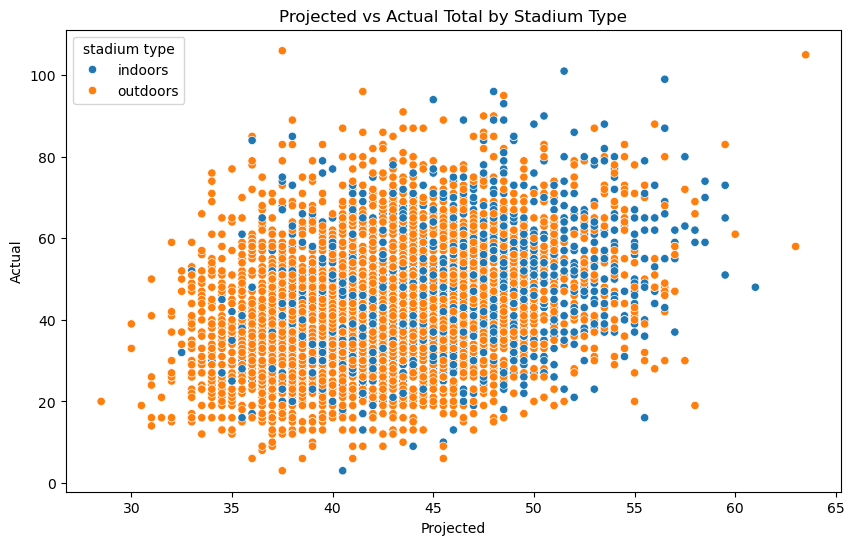

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='projected_total', y='actual_total', hue='stadium type', data=nfl_spread_analysis)
plt.title('Projected vs Actual Total by Stadium Type')
plt.xlabel('Projected')
plt.ylabel('Actual')
plt.show()

#### The scatter plot shows significant variability in the actual totals compared to the projected totals for both indoor and outdoor NFL stadiums.

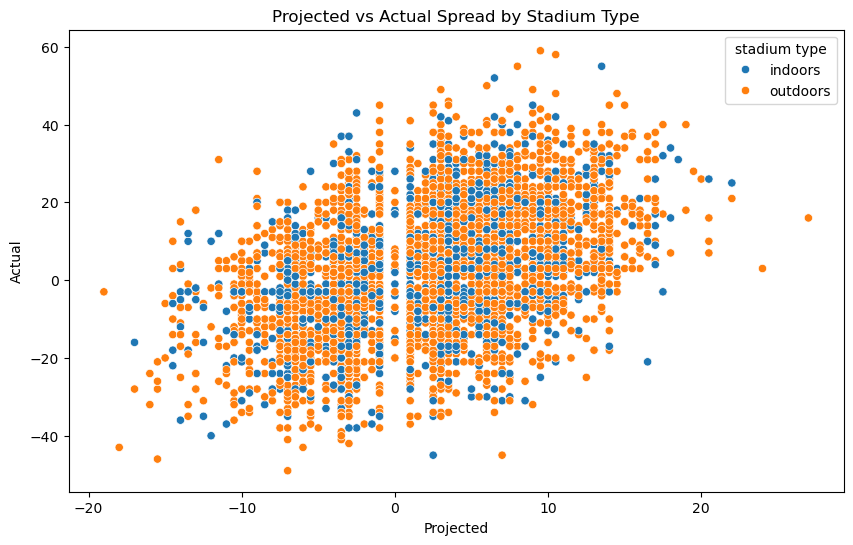

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='projected_spread', y='actual_spread', hue='stadium type', data=nfl_spread_analysis)
plt.title('Projected vs Actual Spread by Stadium Type')
plt.xlabel('Projected')
plt.ylabel('Actual')
plt.show()

#### The scatter plot shows significant variability in the actual spreads compared to the projected totals for both indoor and outdoor NFL stadiums.

 ### Which teams have the highest average scores at home versus away?

In [38]:
avg_home_scores = nfl_spread_analysis.groupby('home_name')['home_score'].mean().reset_index()
top_ten_avg_scores = avg_home_scores.nlargest(10, 'home_score').sort_values(by='home_score', ascending=False)

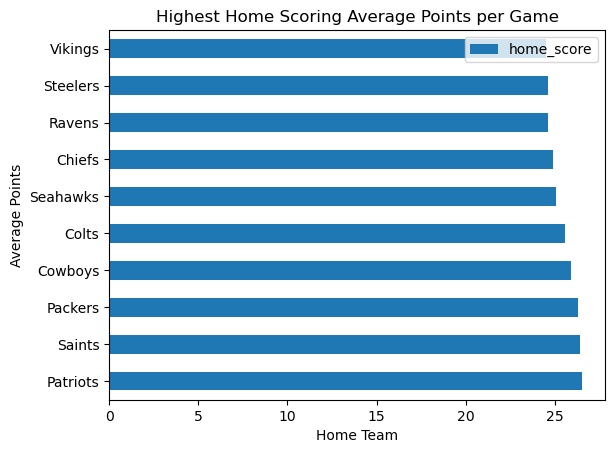

In [39]:
top_ten_avg_scores.plot.barh(x='home_name', y='home_score')
plt.title('Highest Home Scoring Average Points per Game')
plt.xlabel('Home Team')
plt.ylabel('Average Points')
plt.show()

In [40]:
# Create home division team subsets to see how they perform against the spread and total lines
nfc_north = nfl_spread_analysis.loc[nfl_spread_analysis['home_division'] == 'NFC North']
afc_north = nfl_spread_analysis.loc[nfl_spread_analysis['home_division'] == 'AFC North']
nfc_south = nfl_spread_analysis.loc[nfl_spread_analysis['home_division'] == 'NFC South']
afc_south = nfl_spread_analysis.loc[nfl_spread_analysis['home_division'] == 'AFC South']
nfc_east = nfl_spread_analysis.loc[nfl_spread_analysis['home_division'] == 'NFC East']
afc_east = nfl_spread_analysis.loc[nfl_spread_analysis['home_division'] == 'AFC East']
nfc_west = nfl_spread_analysis.loc[nfl_spread_analysis['home_division'] == 'NFC West']
afc_west = nfl_spread_analysis.loc[nfl_spread_analysis['home_division'] == 'AFC West']

In [45]:
nfc_north_spread_correlation = nfc_north['projected_spread'].corr(nfc_north['actual_spread'])
nfc_north_spread_correlation

0.4066454185313941

### How do different teams perform against the spread?

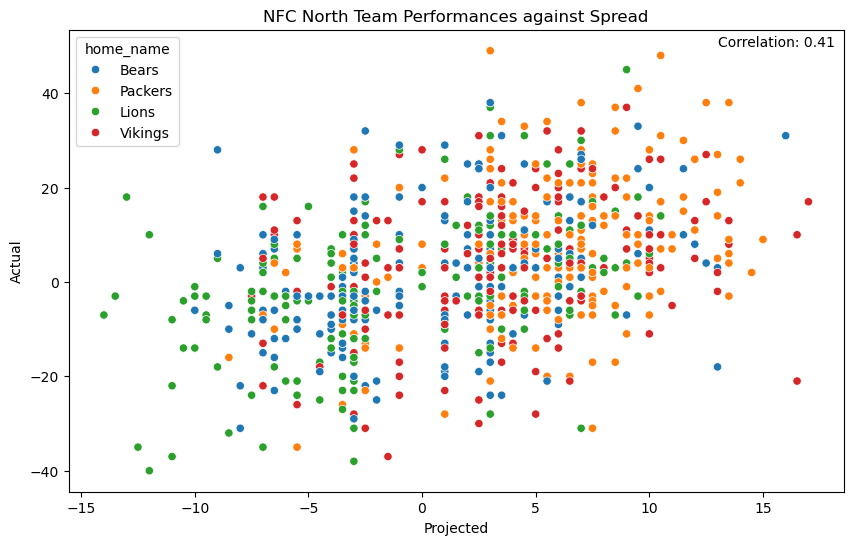

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='projected_spread', y='actual_spread', hue='home_name', data=nfc_north )
plt.title('NFC North Team Performances against Spread')
plt.text(13, 50, f'Correlation: {nfc_north_spread_correlation:.2f}')
plt.xlabel('Projected')
plt.ylabel('Actual')
plt.show()

In [49]:
afc_north_spread_correlation = afc_north['projected_spread'].corr(afc_north['actual_spread'])
afc_north_spread_correlation

0.446661021764369

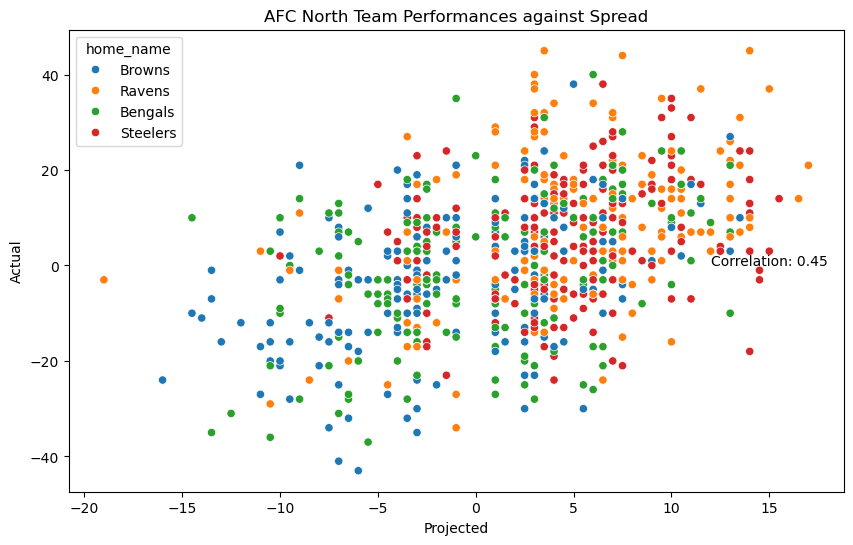

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='projected_spread', y='actual_spread', hue='home_name', data=afc_north )
plt.title('AFC North Team Performances against Spread')
plt.text(12, 0, f'Correlation: {afc_north_spread_correlation:.2f}')
plt.xlabel('Projected')
plt.ylabel('Actual')
plt.show()

In [53]:
nfc_south_spread_correlation = nfc_south['projected_spread'].corr(nfc_south['actual_spread'])
nfc_south_spread_correlation

0.4131145156716987

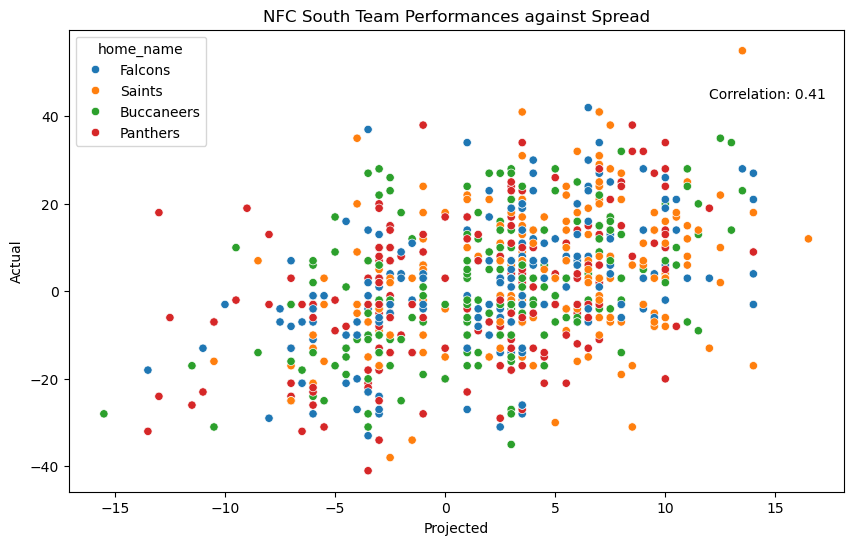

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='projected_spread', y='actual_spread', hue='home_name', data=nfc_south )
plt.title('NFC South Team Performances against Spread')
plt.text(12, 44, f'Correlation: {nfc_south_spread_correlation:.2f}')
plt.xlabel('Projected')
plt.ylabel('Actual')
plt.show()

In [57]:
afc_south_spread_correlation = afc_south['projected_spread'].corr(afc_south['actual_spread'])
afc_south_spread_correlation

0.4276706203005937

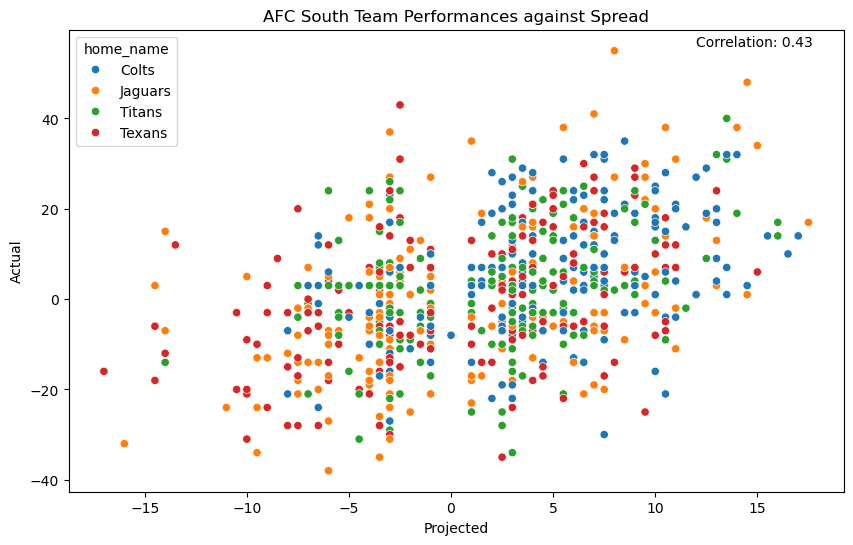

In [65]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='projected_spread', y='actual_spread', hue='home_name', data=afc_south )
plt.title('AFC South Team Performances against Spread')
plt.text(12, 56, f'Correlation: {afc_south_spread_correlation:.2f}')
plt.xlabel('Projected')
plt.ylabel('Actual')
plt.show()

In [67]:
nfc_east_spread_correlation = nfc_east['projected_spread'].corr(nfc_east['actual_spread'])
nfc_east_spread_correlation

0.39179567963129797

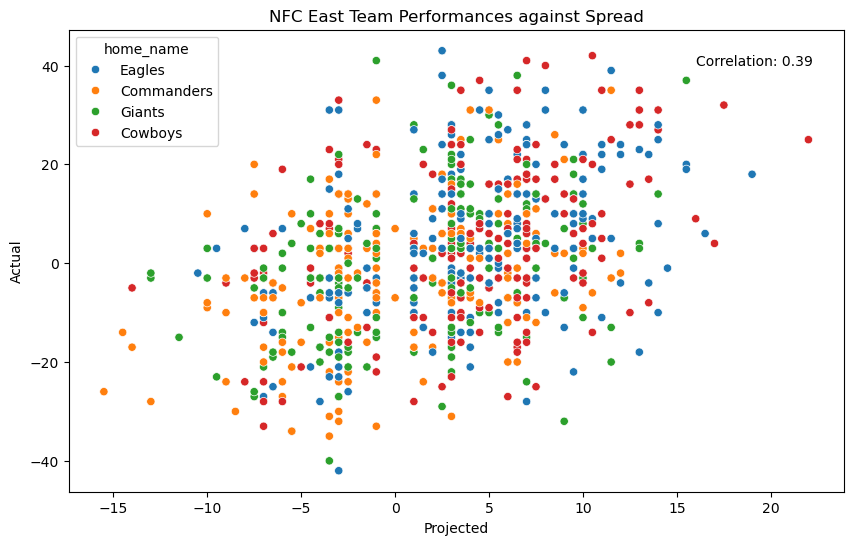

In [79]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='projected_spread', y='actual_spread', hue='home_name', data=nfc_east )
plt.title('NFC East Team Performances against Spread')
plt.text(16, 40, f'Correlation: {nfc_east_spread_correlation:.2f}')
plt.xlabel('Projected')
plt.ylabel('Actual')
plt.show()

In [81]:
afc_east_spread_correlation = afc_east['projected_spread'].corr(afc_east['actual_spread'])
afc_east_spread_correlation

0.4228281375176555

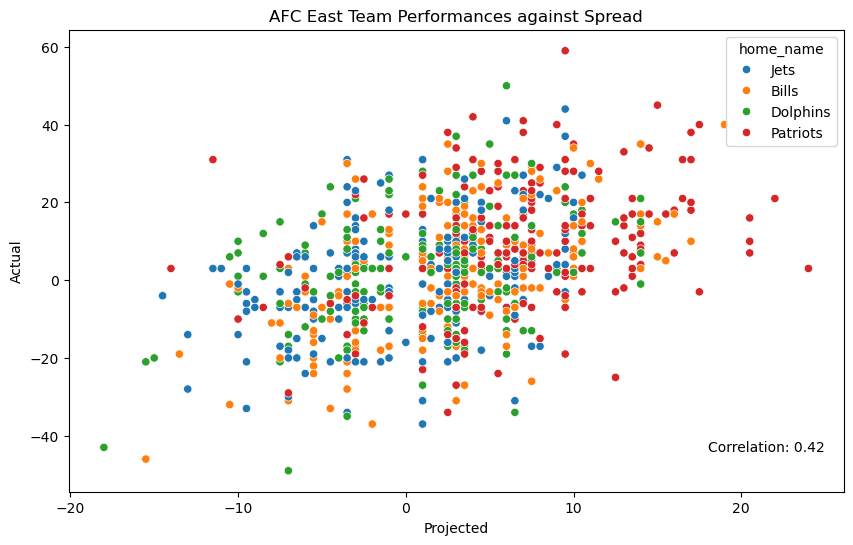

In [121]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='projected_spread', y='actual_spread', hue='home_name', data=afc_east )
plt.title('AFC East Team Performances against Spread')
plt.text(18, -44, f'Correlation: {afc_east_spread_correlation:.2f}')
plt.xlabel('Projected')
plt.ylabel('Actual')
plt.show()

In [123]:
nfc_west_spread_correlation = nfc_west['projected_spread'].corr(nfc_west['actual_spread'])
nfc_west_spread_correlation

0.4348113845621406

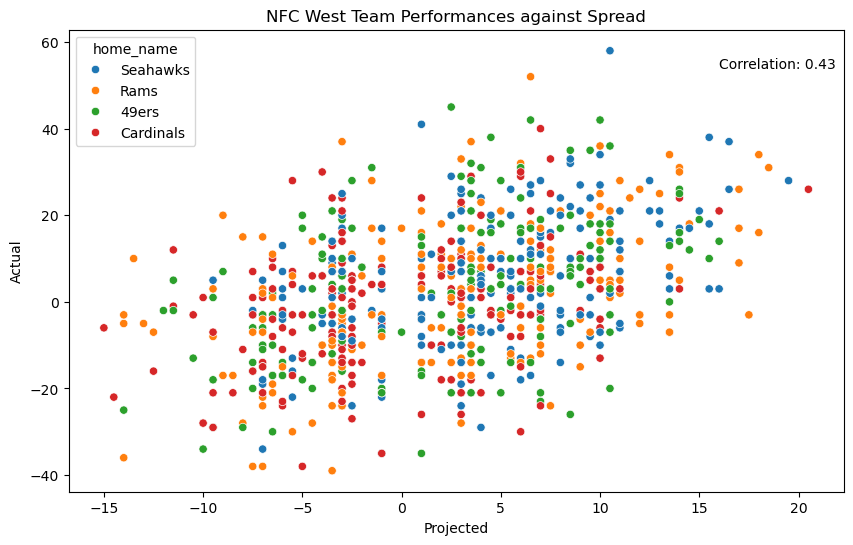

In [137]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='projected_spread', y='actual_spread', hue='home_name', data=nfc_west )
plt.title('NFC West Team Performances against Spread')
plt.text(16, 54, f'Correlation: {nfc_west_spread_correlation:.2f}')
plt.xlabel('Projected')
plt.ylabel('Actual')
plt.show()

### Based on the cluster scatterplots I've created to analyze how each division teams perform it's very similar with a moderate relationship. The AFC North teams tend to perform closer to the spread at 0.45, while NFC East teams tend to have more variance against the spread at 0.39. 

### Questions to be answered in later exercises for the project:

#### Are there any noticeable trends in team performance based on the game location (home vs. away)?

###### TBD and explored further.

#### Are there any noticeable trends in team performance based on the game location (home vs. away)?

###### TBD and explored further.

### How often do games exceed the total points line?

###### TBD and explored further.

### How often does the team with the spread advantage win?

###### TBD and explored further.

### Are there specific weather conditions that favor home or away teams?

###### TBD and explored further. 

### How do temperature, wind speed, and other weather conditions affect game outcomes and scores?

###### TBD and explored further.

###  How do different teams perform in various locations and stadiums?

###### TBD and explored further.

### Export updated dataset

In [185]:
nfl_spread_analysis.to_csv(os.path.join(path, 'updated_nfl_spread_analysis.csv'))